In [216]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_log_error

Insruance Predict Model

In [217]:
train_df = pd.read_csv("raw_data/train.csv")
test_df = pd.read_csv("raw_data/test.csv")
train_df.head()
print(f"Columns Informaiton {train_df.columns}")

Columns Informaiton Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')


In [218]:
print(train_df.dtypes)
non_object_columns = train_df.select_dtypes(exclude=['object'])
print(non_object_columns.columns)
columns_list = non_object_columns.columns
print(columns_list)

id                        int64
Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
Premium Amount          float64
dtype: object
Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount'],
      dtype='object')
Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicl

In [219]:
# Inital Training regarding all of informaiton
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Initally how many data is populates how should pdisplay on this.
def inital_check(train_df):

    non_object_columns_df = train_df.select_dtypes(exclude=['object'])
    # X = non_object_columns_df.drop(columns=["Premium Amount"], errors='ignore')

    X = non_object_columns_df.drop(columns = ["Premium Amount"], errors = 'ignore')
    y = train_df["Premium Amount"]

   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(random_state=42)
   
    model.fit(X_train, y_train)

    # Evaluate the Model
    y_pred = model.predict(X_test)
    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'R² Score: {r2_score(y_test, y_pred)}')

# inital_check(train_df)

In [220]:
train_df.describe()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [221]:
# How many percentage has null value for it.
train_df.isnull().sum() / train_df.shape[0]


id                      0.000000e+00
Age                     1.558750e-02
Gender                  0.000000e+00
Annual Income           3.745750e-02
Marital Status          1.544083e-02
Number of Dependents    9.139333e-02
Education Level         0.000000e+00
Occupation              2.983958e-01
Health Score            6.173000e-02
Location                0.000000e+00
Policy Type             0.000000e+00
Previous Claims         3.033575e-01
Vehicle Age             5.000000e-06
Credit Score            1.149017e-01
Insurance Duration      8.333333e-07
Policy Start Date       0.000000e+00
Customer Feedback       6.485333e-02
Smoking Status          0.000000e+00
Exercise Frequency      0.000000e+00
Property Type           0.000000e+00
Premium Amount          0.000000e+00
dtype: float64

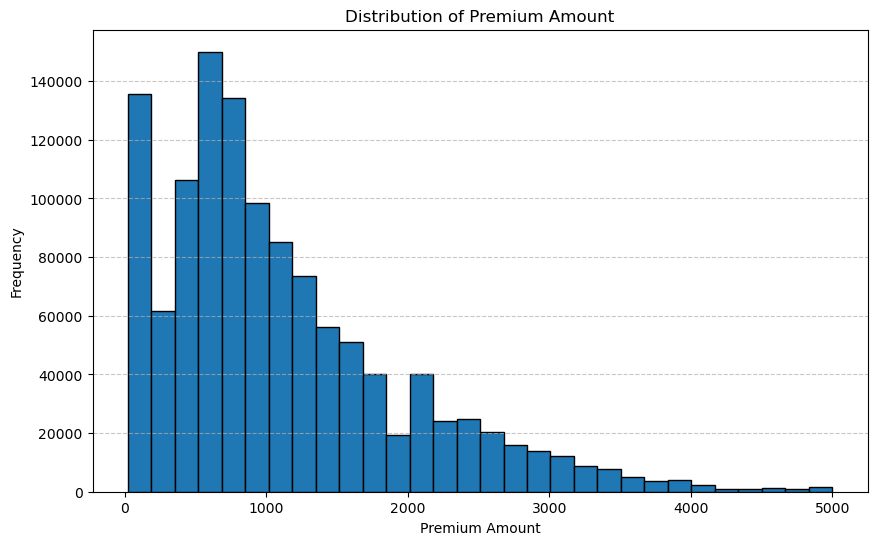

In [222]:
# Target value checking on distribution how data has been distributed.
import matplotlib.pyplot as plt

# Plot histogram for Premium Amount
plt.figure(figsize=(10, 6))
plt.hist(train_df['Premium Amount'], bins=30, edgecolor='black')
plt.title('Distribution of Premium Amount')
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [223]:
def populate_each_object_unique_values(train_df):
    object_columns_df = train_df.select_dtypes(exclude=['float64', 'int64'])
    unique_values_dict = {}
    for column in object_columns_df.columns:
        unique_values_dict[column] = object_columns_df[column].unique().tolist()
    
    return unique_values_dict
train_df = pd.read_csv("raw_data/train.csv")

train_df['Policy Start Date'] = pd.to_datetime(train_df['Policy Start Date']).dt.date
unique_values = populate_each_object_unique_values(train_df)
# Print the results
for col, values in unique_values.items():
    print(f"Column: {col}: {values}")

Column: Gender: ['Female', 'Male']
Column: Marital Status: ['Married', 'Divorced', 'Single', nan]
Column: Education Level: ["Bachelor's", "Master's", 'High School', 'PhD']
Column: Occupation: ['Self-Employed', nan, 'Employed', 'Unemployed']
Column: Location: ['Urban', 'Rural', 'Suburban']
Column: Policy Type: ['Premium', 'Comprehensive', 'Basic']
Column: Policy Start Date: [datetime.date(2023, 12, 23), datetime.date(2023, 6, 12), datetime.date(2023, 9, 30), datetime.date(2024, 6, 12), datetime.date(2021, 12, 1), datetime.date(2022, 5, 20), datetime.date(2020, 2, 21), datetime.date(2022, 8, 8), datetime.date(2020, 12, 14), datetime.date(2020, 8, 2), datetime.date(2021, 5, 12), datetime.date(2020, 3, 22), datetime.date(2021, 10, 28), datetime.date(2023, 1, 20), datetime.date(2021, 8, 14), datetime.date(2020, 10, 17), datetime.date(2024, 4, 22), datetime.date(2020, 12, 27), datetime.date(2021, 10, 13), datetime.date(2020, 6, 25), datetime.date(2024, 6, 25), datetime.date(2023, 7, 31), dat

In [224]:
train_df = pd.read_csv("raw_data/train.csv")

mapping_dict = {
    'Gender': {'Female': 0, 'Male': 1},
    'Marital Status': {'Married': 0, 'Divorced': 1, 'Single': 2},
    'Education Level': {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3},
    'Occupation': {'Unemployed': 0, 'Self-Employed': 1, 'Employed': 2},
    'Location': {'Urban': 0, 'Suburban': 1, 'Rural': 2},
    'Smoking Status': {'No': 0, 'Yes': 1},
    'Exercise Frequency': {'Rarely': 0, 'Monthly': 1, 'Weekly': 2, 'Daily': 3},
    'Property Type': {'House': 0, 'Apartment': 1, 'Condo': 2}
}

# 매핑 적용 함수
def apply_mapping(df, mapping):
    for column, mapping_values in mapping.items():
        if column in df.columns:
            df[column] = df[column].map(mapping_values)
    return df

# 매핑 적용
train_df = apply_mapping(train_df, mapping_dict)

# 결과 확인
print(train_df.head())

def preapre_clean_data(train_df):
    print(f"Original Shape {train_df.shape}")
    target_df = apply_mapping(train_df, mapping_dict)

    target_df = target_df.dropna()
    
    return target_df

target_df = preapre_clean_data(train_df)
target_df.head()

   id   Age  Gender  Annual Income  Marital Status  Number of Dependents  \
0   0  19.0       0        10049.0             0.0                   1.0   
1   1  39.0       0        31678.0             1.0                   3.0   
2   2  23.0       1        25602.0             1.0                   3.0   
3   3  21.0       1       141855.0             0.0                   2.0   
4   4  21.0       1        39651.0             2.0                   1.0   

   Education Level  Occupation  Health Score  Location  ... Previous Claims  \
0                1         1.0     22.598761         0  ...             2.0   
1                2         NaN     15.569731         2  ...             1.0   
2                0         1.0     47.177549         1  ...             1.0   
3                1         NaN     10.938144         2  ...             1.0   
4                1         1.0     20.376094         2  ...             0.0   

   Vehicle Age  Credit Score  Insurance Duration           Policy St

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount


In [225]:
train_df = pd.read_csv("raw_data/train.csv")
# How many data has been changed.
# What I need I need data informaiton

correation_thersohold = 1 / len(train_df.columns)
missing_value_threshold = 0.3


import pandas as pd
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df):
   label_encoders = {}  # 각 컬럼에 대한 LabelEncoder를 저장
   for column in df.select_dtypes(include=['object']).columns:
       le = LabelEncoder()
       df[column] = le.fit_transform(df[column])
       label_encoders[column] = le 
   return df, label_encoders

target_df = encode_categorical_columns(train_df)

target_df = train_df.drop(columns=["id"])
correlation_matrix = target_df.corr()

if 'Premium Amount' in target_df.columns:
    premium_correlation = correlation_matrix['Premium Amount']
    
    # Sort the correlations in ascending order
    sorted_correlation = premium_correlation.abs().sort_values(ascending=True)
    print(sorted_correlation)

# As a result, when we create model, we can ignore Insurance Duration, Vehicle Age????

missing_values = target_df.isna().sum().sort_values(ascending=False)
print("Number of missing values in each column:")
print(missing_values)

Insurance Duration      0.000028
Gender                  0.000161
Smoking Status          0.000163
Vehicle Age             0.000391
Policy Type             0.000884
Number of Dependents    0.000976
Location                0.001059
Exercise Frequency      0.001098
Education Level         0.001121
Property Type           0.001222
Age                     0.002430
Marital Status          0.005356
Occupation              0.006059
Policy Start Date       0.010087
Annual Income           0.012390
Health Score            0.014704
Customer Feedback       0.015772
Credit Score            0.026014
Previous Claims         0.046874
Premium Amount          1.000000
Name: Premium Amount, dtype: float64
Number of missing values in each column:
Previous Claims         364029
Credit Score            137882
Number of Dependents    109672
Health Score             74076
Annual Income            44949
Age                      18705
Vehicle Age                  6
Insurance Duration           1
Occupation    

In [226]:
train_df = pd.read_csv("raw_data/train.csv")
print(missing_values.keys())
print(premium_correlation.keys())
columns_to_drop = [] 
train_df = train_df.drop(columns=["id"])
for col in train_df.columns:
    print(col)
    if premium_correlation.abs()[col] < correation_thersohold and (missing_values[col] / len(train_df)) > missing_value_threshold:
        columns_to_drop.append(col)
        
print(columns_to_drop)

Index(['Previous Claims', 'Credit Score', 'Number of Dependents',
       'Health Score', 'Annual Income', 'Age', 'Vehicle Age',
       'Insurance Duration', 'Occupation', 'Education Level', 'Location',
       'Policy Type', 'Gender', 'Marital Status', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')
Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')
Age
Gender
Annual Income
Marital Status
Number of Dependents
Education Level
Occupation
Health Score
Location
Policy Type
Previous Claims
Vehicle Age
Credit Score
Insurance Duration
Policy

In [227]:
target_df = train_df.drop(columns=['Previous Claims'])
target_df.shape

duplicate_rows = target_df[target_df.duplicated()]

# Print duplicate rows
# Duplicate Data not exists
print("Duplicate rows in the DataFrame:")

print(target_df.isna().sum())
correlation_matrix = target_df.corr()
premium_correlation = correlation_matrix['Premium Amount']
print(premium_correlation)




Duplicate rows in the DataFrame:
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64
Age                    -0.002430
Annual Income          -0.012390
Number of Dependents   -0.000976
Health Score            0.014704
Vehicle Age             0.000391
Credit Score           -0.026014
Insurance Duration     -0.000028
Premium Amount          1.000000
Name: Premium Amount, dtype: float64


C:\Users\ykim\AppData\Local\Temp\ipykernel_23204\1791938810.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = target_df.corr()


In [228]:
target_df, label = encode_categorical_columns(train_df)



target_df.head()
target_df = target_df.dropna()

# numbers_of_depdents_median = target_df["Number of Dependents"].median()
# print("numbers_of_depdents_mea", numbers_of_depdents_median)
# target_df["Number of Dependents"] = target_df["Number of Dependents"].fillna(numbers_of_depdents_median)


# target_df['Previous Claims'] = target_df["Previous Claims"].fillna(0)

# target_df["Age"] = target_df["Number of Dependents"].fillna(2)
# annual_income_mean = target_df["Annual Income"].dropna().mean()
# print("annual_income_mean", annual_income_mean)
# target_df["Annual Income"] = target_df["Annual Income"].fillna(annual_income_mean)

# health_score_mean = target_df["Health Score"].dropna().mean()
# print("Health Score", health_score_mean)
# target_df["Health Score"] = target_df["Health Score"].fillna(health_score_mean)

# credit_score_mean = target_df["Credit Score"].dropna().mean()
# print("credit_score_mean", credit_score_mean)
# target_df["Credit Score"] = target_df["Credit Score"].fillna(credit_score_mean)


In [229]:
# Convert age variiences
target_df["Age Variance"] = target_df["Age"] / 10


C:\Users\ykim\AppData\Local\Temp\ipykernel_23204\462073808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df["Age Variance"] = target_df["Age"] / 10


In [230]:
# Categorial column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))
# The ways to handle categorial data
train_df = pd.read_csv("raw_data/train.csv")

na_contains_list = train_df.isna().sum()
columns_with_na = na_contains_list[na_contains_list > 0].index.tolist()
print(columns_with_na)



['Age', 'Annual Income', 'Marital Status', 'Number of Dependents', 'Occupation', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Customer Feedback']


In [231]:
# Final Data sets I have provided,
# Poloynomial Regression tests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# The StandardScaler in Scikit-learn is used to standardize features by removing the mean and scaling to unit variance. 
# This ensures that the features have a mean of 0 and a standard deviation of 1

def polyNominalFeature(df):
    df = target_df.dropna()
    X = df.drop(columns=["Premium Amount", "Policy Start Date"])
    y = df['Premium Amount']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Generate polynomial features
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Train a linear regression model on polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions
    y_pred = model.predict(X_test_poly)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    print("Mean Squared Error:", mse)
    print("R² Score:", r2)

    # Coefficients of the polynomial regression model
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)

polyNominalFeature(target_df)
target_df.shape
# Mean Squared Error: 744644.8509066248
# R² Score: 0.009276541312562392
# Intercept: 7462372752099.933

# It calculaters faster how every there are accurate is too low.

Mean Squared Error: 748374.2859095214
R² Score: 0.007382727111172271
Coefficients: [-6.36774903e+12 -6.08165258e+12 -4.66602783e+01  4.13567352e+00
 -1.28435516e+00 -1.39626312e+00 -4.90507126e+00  8.69911146e+00
 -3.66275311e-02 -2.55797005e+00  3.20201256e+01 -1.22075593e+00
 -2.18927248e+01 -1.57947000e-02  8.99466784e+00 -2.73056942e+11
  2.62389954e-01  8.38017790e-01  6.36774903e+12 -6.54602064e+14
 -7.23794226e+13  3.83936857e+12 -9.95792400e+13  7.69527648e+13
 -1.19100352e+13  1.36962091e+15 -3.19372638e+14  2.61745085e+14
  1.32076973e+15  2.95105740e+12  6.61059716e+13  1.76391619e+14
 -2.92108201e+13  1.40307749e+15 -9.32661726e+13  4.36647202e+13
 -6.73930570e+14  1.79738826e+14 -5.94003539e+14 -9.06250000e-01
  1.21374512e+00 -3.81835938e-01 -1.64843750e+00 -3.20703125e+00
 -1.87500000e+00 -5.93750000e-01  2.75390625e+00 -6.56250000e-01
 -2.89062500e-01  9.37500000e-02 -1.07421875e-01 -2.24023438e+00
  5.07812500e-01 -8.04687500e-01 -4.30957031e+00  7.23794226e+13
  1.228

(595316, 21)

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount', 'Age Variance'],
      dtype='object')
(595316, 21)
Property Type           0.000031
Smoking Status          0.000049
Vehicle Age             0.000156
Insurance Duration      0.000232
Gender                  0.000747
Exercise Frequency      0.000889
Location                0.000908
Number of Dependents    0.001728
Policy Type             0.001764
Education Level         0.002017
Age                     0.003522
Age Variance            0.003522
Marital Status          0.004959
Occupation              0.006021
Annual Income           0.007079
Policy Start Date       0.009946
Health Score            0.012851
Cust

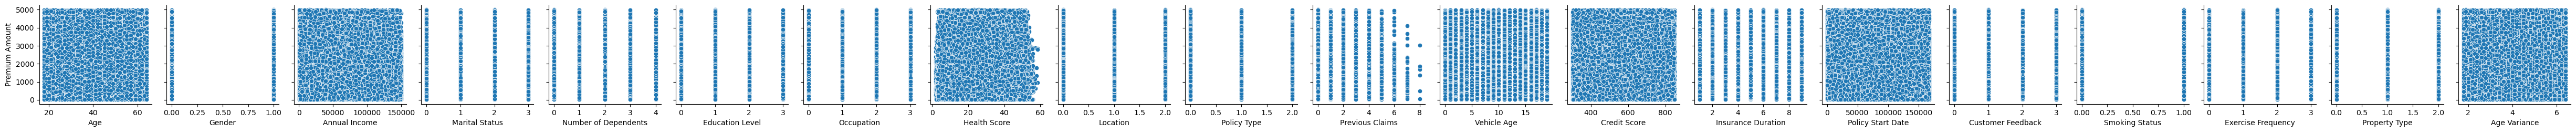

In [232]:
print(target_df.columns)
print(target_df.shape) 
correlation_matrix = target_df.corr()


premium_correlation = correlation_matrix['Premium Amount']


import seaborn as sns
import matplotlib.pyplot as plt

def visulaize_corr(target_df):
    target_columns = ["Premium Amount"] 
    dropped_df = target_df.drop(columns=target_columns)  # Exclude target columns
    X_vars_list =  dropped_df.columns

    print(premium_correlation.abs().sort_values(ascending=True))

    # Visulizes
    sns.pairplot(target_df, y_vars='Premium Amount', x_vars=X_vars_list)
    plt.show()
visulaize_corr(target_df)
# General Demographic Information
# id: Unique identifier (if needed to group individuals).
# Age: The individual's age.
# Gender: The individual's gender.
# Marital Status: Marital status (e.g., single, married, divorced).
# Number of Dependents: Number of dependents the individual has.
# Education Level: The level of education completed by the individual.
# Occupation: The individual's profession or job.
# Other Information Categories


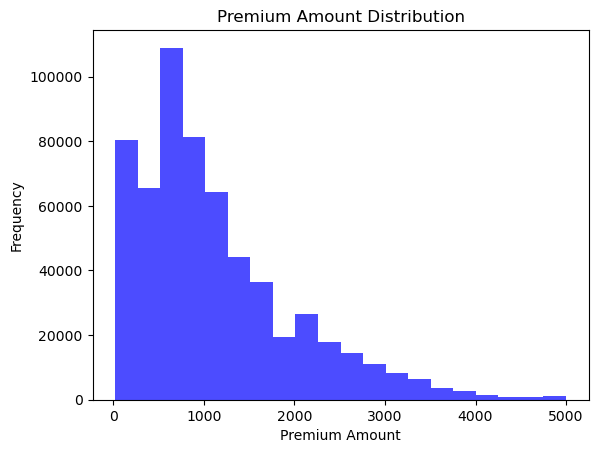

In [233]:
import matplotlib.pyplot as plt

# Premium Amount 분포 확인
plt.hist(target_df['Premium Amount'], bins=20, color='blue', alpha=0.7)
plt.title("Premium Amount Distribution")
plt.xlabel("Premium Amount")
plt.ylabel("Frequency")
plt.show()

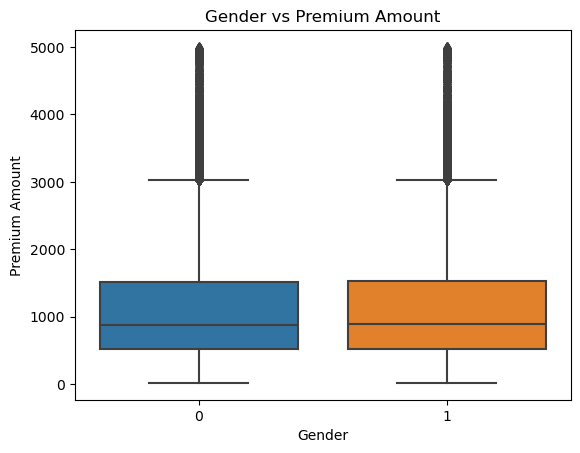

In [234]:
import seaborn as sns

# 예: Age에 따른 Premium Amount 분포
sns.boxplot(x='Gender', y='Premium Amount', data=target_df)
plt.title("Gender vs Premium Amount")
plt.show()

6     30373
0     30169
4     30068
11    30027
2     29883
17    29853
15    29790
14    29776
10    29765
16    29761
9     29754
19    29732
3     29727
8     29714
13    29678
18    29671
12    29577
5     29474
1     29363
7     29161
Name: Premium Category, dtype: int64
4999.0
20.0


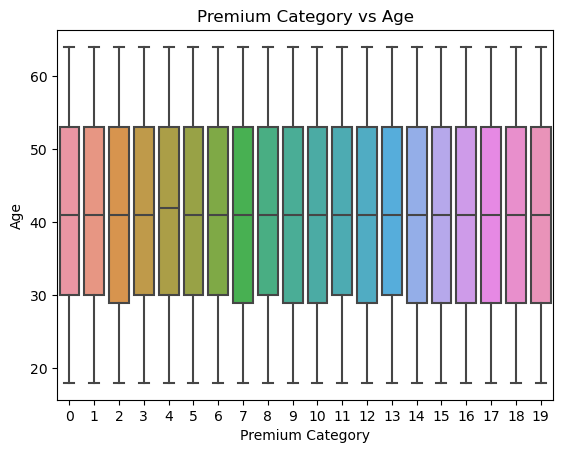

In [235]:
# Premium Amount를 구간화
target_df['Premium Category'] = pd.qcut(target_df['Premium Amount'], q=20, labels=False)

# pd.qcut은 값의 범위가 아니라 데이터의 개수를 기준으로 구간을 나눕니다. 이렇게 하면 각 구간에 데이터가 균등하게 분포합니다


# 구간별로 확인
print(target_df['Premium Category'].value_counts())
print(target_df['Premium Amount'].max())
print(target_df['Premium Amount'].min())

sns.boxplot(x='Premium Category', y='Age', data=target_df)
plt.title("Premium Category vs Age")
plt.show()

In [236]:
df = target_df.dropna()

X = df.drop(columns=['Premium Category', "Policy Start Date", "Age",  "Premium Amount"])

y = df['Premium Category']

# Annual Income / Vehicle Age (수입 대비 차량 연령 비율)
# Credit Score * Insurance Duration (신용 점수와 보험 가입 기간의 상호작용)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train a linear regression model on polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Coefficients of the polynomial regression model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 32.73488460670698
R² Score: 0.016393049216384292
Coefficients: [ 1.44143634e+10 -6.28906250e-01  3.49121094e-02 -8.60595703e-03
 -1.01928711e-02 -3.12500000e-02  7.32879639e-02  5.79833984e-03
 -1.10664368e-02  2.54399300e-01 -7.68661499e-04 -2.96564877e-01
  6.41167164e-04  7.91249182e-02  6.46933633e+08  5.12266648e-04
  6.87077292e-04 -2.14345091e-02  1.40787109e+12 -2.68070521e-03
  4.52790603e-03 -1.39434912e-03 -9.49056614e-03 -1.62022657e-02
 -5.15741464e-03 -6.39067087e-03  1.57095189e-02 -1.52584611e-03
  2.36797354e-03 -8.55855753e-03  2.79499922e-03 -1.48377798e-02
 -1.11527741e-03  3.66116315e-03 -2.16875076e-02  4.52041626e-04
  2.24990845e-02  4.82597351e-02  4.03213501e-03 -6.90078735e-03
 -1.02105141e-02  7.80830085e-02  1.63475573e-02  8.43967497e-03
  3.43377322e-01 -2.24987604e-02 -3.08716707e-01  4.04619426e-03
  1.13916397e-01  9.74024832e-03  3.09857726e-03 -6.28692983e-03
 -1.17599666e-02  6.46530688e-02  5.23351505e-03  1.84819940e-03
 -3.796

Correlation between Annual Income and Premium Amount: -0.007079292296556524


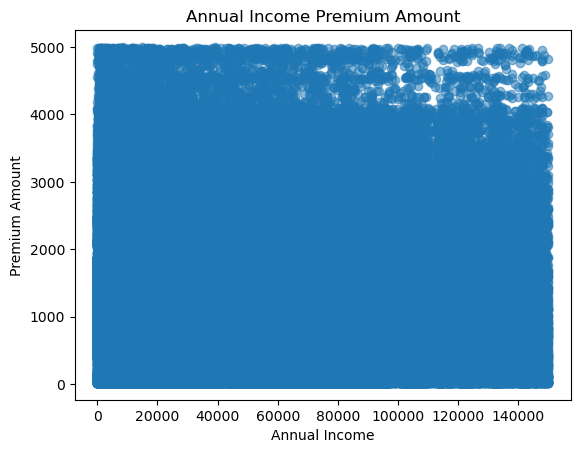

Correlation between Health Score and Premium Amount: 0.01285084584714834


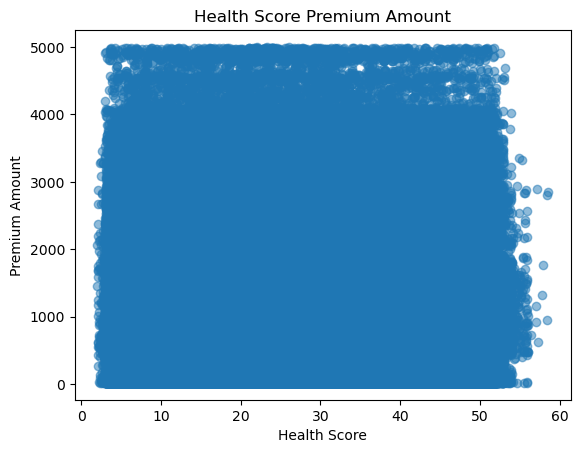

Correlation between Credit Score and Premium Amount: -0.02127549675377253


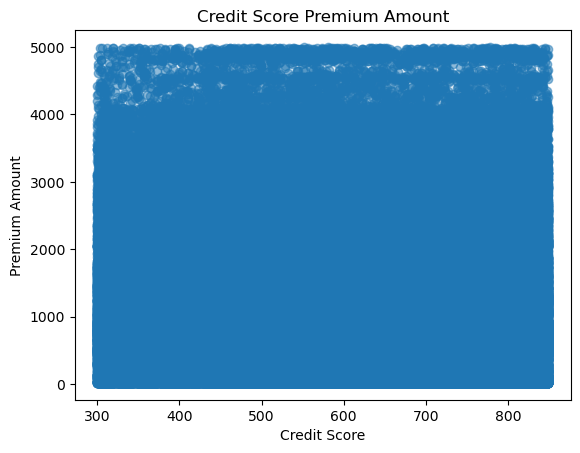

In [237]:
import numpy as np

def display_target_correlation(target_df, target_column, target_value = "Premium Amount"):
    # Pearson Correlation
    correlation = target_df[target_column].corr(target_df[target_value], method='pearson')
    print(f"Correlation between {target_column} and {target_value}: {correlation}")

    import matplotlib.pyplot as plt

    # 이렇게 나올수가 있다는거는 크게 연관이 없을 수도 있다.
    plt.scatter(target_df[target_column], target_df[target_value], alpha=0.5)
    plt.title(f'{target_column} Premium Amount')
    plt.xlabel(target_column)
    plt.ylabel(target_value)
    plt.show()


display_target_correlation(target_df,"Annual Income")
display_target_correlation(target_df,"Health Score")
display_target_correlation(target_df,"Credit Score")


0          2869.0
1          1483.0
3           765.0
4          2022.0
5          3202.0
            ...  
1199986    2760.0
1199987     473.0
1199988    1542.0
1199990     231.0
1199993    1027.0
Name: Premium Amount, Length: 595316, dtype: float64
Correlation between Annual Income and Premium Amount Log: -0.08532881032018995


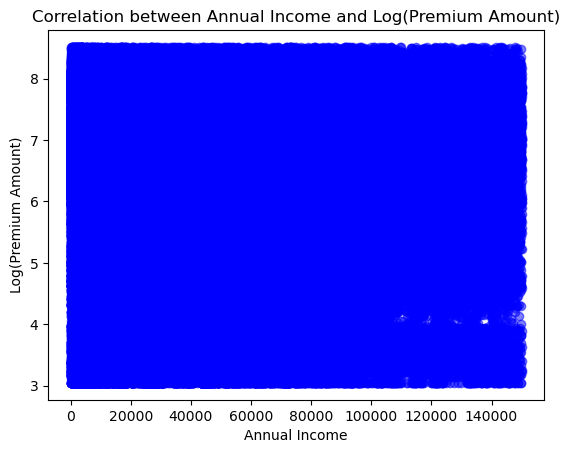

In [238]:
target_df.shape
print(target_df["Premium Amount"])

def log_target_df(target_df, target_column):
    """
    Analyze the correlation between a given column and the log-transformed Premium Amount.

    Parameters:
    - target_df (pd.DataFrame): The DataFrame containing the data.
    - target_column (str): The column to correlate with the log-transformed Premium Amount.
    """
    # Apply log transformation to Premium Amount
    target_df["Premium Amount Log"] = np.log1p(target_df["Premium Amount"])

    # Drop the original Premium Amount column (optional)
    target_df = target_df.drop(columns="Premium Amount")

    # Calculate correlation
    correlation = target_df[target_column].corr(target_df["Premium Amount Log"], method='pearson')
    print(f"Correlation between {target_column} and Premium Amount Log: {correlation}")

    # Scatter plot
    plt.scatter(target_df[target_column], target_df["Premium Amount Log"], alpha=0.5, color="blue")
    plt.title(f'Correlation between {target_column} and Log(Premium Amount)')
    plt.xlabel(target_column)
    plt.ylabel('Log(Premium Amount)')
    plt.show()

log_target_df(target_df, target_column="Annual Income")